In [43]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [44]:
all_df = pd.read_csv("bank.csv")

In [45]:
cols=['age','balance' ,'day', 'duration',
       'campaign','pdays','previous','deposit']
all_df=all_df[cols]

In [46]:
all_df['deposit']= all_df['deposit'].map({'no':0, 'yes': 1}).astype(int)

In [47]:
X=all_df.drop(['deposit'], axis=1).values.astype('float64')

In [48]:
Y = all_df['deposit'].values.astype('int64')

In [49]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

8929

In [50]:
test_Features[:2]

array([[-0.85890111, -0.3021573 , -1.26574556, -0.8008745 , -0.55416834,
        -0.48118405, -0.36325984],
       [ 0.14841574, -0.31455937,  0.51565047, -0.97372895, -0.18678537,
        -0.48118405, -0.36325984]])

In [51]:
train_Label[:4]

array([0, 1, 0, 1])

In [52]:
train_Features.shape

(8929, 7)

In [53]:
test_Label[:4]

array([0, 0, 0, 1])

In [54]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [55]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [56]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [57]:
model = Sequential()

In [58]:
model.add(Conv1D(filters=7*8,
                 kernel_size=1,
                 padding='valid',
                 input_shape=(7,1), 
                 activation='relu'))

In [59]:
model.add(MaxPooling1D(pool_size=1))

In [60]:
model.add(Conv1D(filters=7*7,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [61]:
model.add(MaxPooling1D(pool_size=1))

In [62]:
model.add(Conv1D(filters=7*6,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [63]:
model.add(MaxPooling1D(pool_size=1))

In [64]:
model.add(Conv1D(filters=7*5,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [65]:
model.add(MaxPooling1D(pool_size=1))

In [66]:
model.add(Conv1D(filters=7*4,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [67]:
model.add(MaxPooling1D(pool_size=1))

In [68]:
model.add(Conv1D(filters=7*3,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [69]:
model.add(MaxPooling1D(pool_size=1))

In [70]:
model.add(Conv1D(filters=7*2,
                 kernel_size=1,
                 padding='valid', 
                 activation='relu'))

In [71]:
model.add(MaxPooling1D(pool_size=1))

In [72]:
model.add(Conv1D(filters=7,
                 kernel_size=1,
                 padding='valid', 
                 activation='relu'))

In [73]:
model.add(MaxPooling1D(pool_size=1))

In [74]:
model.add(Flatten())

In [75]:
model.add(Dense(7, activation='tanh'))

In [76]:
model.add(Dense(1,activation='sigmoid'))

In [77]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 7, 56)             112       
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 7, 56)             0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 7, 49)             2793      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 7, 49)             0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 7, 42)             2100      
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 7, 42)             0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 7, 35)             1505      
__________

In [78]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [79]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=500,verbose=1,callbacks=[early_stopping])

Train on 7143 samples, validate on 1786 samples
Epoch 1/30
7143/7143 [==============================] - 6s 874us/step - loss: 0.6860 - acc: 0.6597 - val_loss: 0.6752 - val_acc: 0.7184
Epoch 2/30
7143/7143 [==============================] - 2s 273us/step - loss: 0.6533 - acc: 0.7145 - val_loss: 0.6312 - val_acc: 0.6999
Epoch 3/30
7143/7143 [==============================] - 2s 294us/step - loss: 0.6008 - acc: 0.7011 - val_loss: 0.5902 - val_acc: 0.7016
Epoch 4/30
7143/7143 [==============================] - 2s 318us/step - loss: 0.5704 - acc: 0.7151 - val_loss: 0.5687 - val_acc: 0.7184
Epoch 5/30
7143/7143 [==============================] - 2s 258us/step - loss: 0.5528 - acc: 0.7312 - val_loss: 0.5531 - val_acc: 0.7245
Epoch 6/30
7143/7143 [==============================] - 3s 384us/step - loss: 0.5397 - acc: 0.7318 - val_loss: 0.5406 - val_acc: 0.7284
Epoch 7/30
7143/7143 [==============================] - 2s 266us/step - loss: 0.5281 - acc: 0.7407 - val_loss: 0.5298 - val_acc: 0.7419


In [80]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

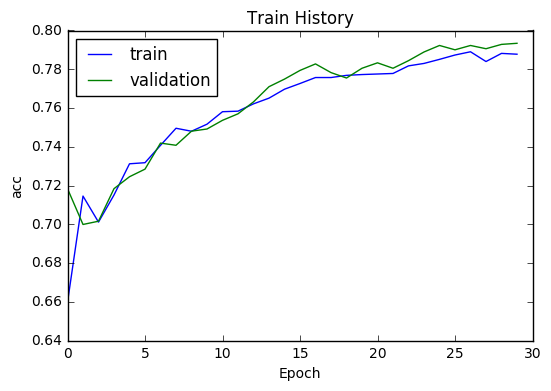

In [81]:
show_train_history(train_history,'acc','val_acc')

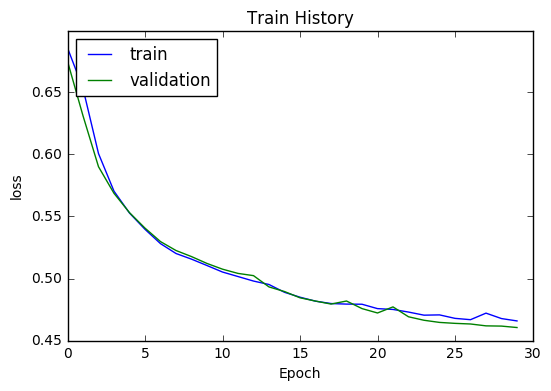

In [82]:
show_train_history(train_history,'loss','val_loss')

In [83]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

2233/2233 [==============================] - 1s 476us/step


In [84]:
scores[1]

0.7868338556926026